In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)  # Features
y = housing.target  # Target (house price)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),  # Hidden layer 1 with L2 regularization
    keras.layers.Dropout(0.3),  # Increased dropout to reduce overfitting
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),  # Hidden layer 2 with L2 regularization
    keras.layers.Dropout(0.3),  
    keras.layers.Dense(16, activation='relu'),  # Hidden layer 3
    keras.layers.Dense(1)  # Output layer for regression (no activation)
])

In [6]:
# Compile the model with Adam optimizer and reduced learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Reduced learning rate
              loss='mse', 
              metrics=['mae'])

In [7]:
# Add Early Stopping to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [8]:
# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/100


1032/1032 [==============================] - 3s 2ms/step - loss: 1.3659 - mae: 0.6991 - val_loss: 0.7336 - val_mae: 0.4885
Epoch 2/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.7292 - mae: 0.5320 - val_loss: 0.5814 - val_mae: 0.4689
Epoch 3/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.6123 - mae: 0.5082 - val_loss: 0.5561 - val_mae: 0.4790
Epoch 4/100
1032/1032 [==============================] - 2s 1ms/step - loss: 0.5534 - mae: 0.4989 - val_loss: 0.4887 - val_mae: 0.4511
Epoch 5/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5194 - mae: 0.4880 - val_loss: 0.4776 - val_mae: 0.4822
Epoch 6/100
1032/1032 [==============================] - 2s 1ms/step - loss: 0.4973 - mae: 0.4806 - val_loss: 0.4562 - val_mae: 0.4630
Epoch 7/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.4901 - mae: 0.4799 - val_loss: 0.4477 - val_mae: 0.4514
Epoch 8/100
1032/1032 [==============================

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"📉 Test MAE: {test_mae:.2f}")  # Lower MAE is better


129/129 [==============================] - 0s 1ms/step - loss: 0.3813 - mae: 0.4047
📉 Test MAE: 0.40


In [14]:
# Predict house prices
y_pred = model.predict(X_test)

# Show first 5 predictions
print("Predicted Prices:", np.round(y_pred[:5].flatten(), 2))
print("Actual Prices:", y_test[:5])


129/129 [==============================] - 0s 1ms/step
Predicted Prices: [0.9  1.68 4.   2.59 2.67]
Actual Prices: [0.477   0.458   5.00001 2.186   2.78   ]


In [16]:
# Predict house prices using the trained model
y_pred = model.predict(X_test)

# Convert predictions to a readable format (flatten to 1D array)
y_pred = y_pred.flatten()

# Display the first 5 actual vs. predicted values
print("📌 First 5 House Price Predictions:")
for i in range(5):
    print(f"🏠 House {i+1}: Predicted Price = ${y_pred[i]:,.2f}, Actual Price = ${y_test[i]:,.2f}")

# If using scaled data, remember to inverse transform the predictions!


129/129 [==============================] - 0s 981us/step
📌 First 5 House Price Predictions:
🏠 House 1: Predicted Price = $0.90, Actual Price = $0.48
🏠 House 2: Predicted Price = $1.68, Actual Price = $0.46
🏠 House 3: Predicted Price = $4.00, Actual Price = $5.00
🏠 House 4: Predicted Price = $2.59, Actual Price = $2.19
🏠 House 5: Predicted Price = $2.67, Actual Price = $2.78


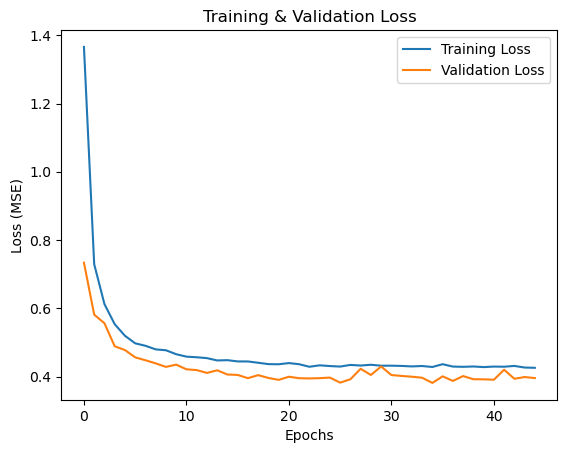

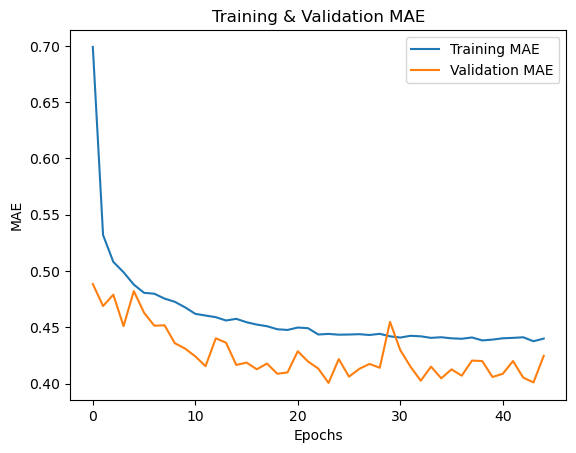

In [17]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.title("Training & Validation MAE")
plt.show()


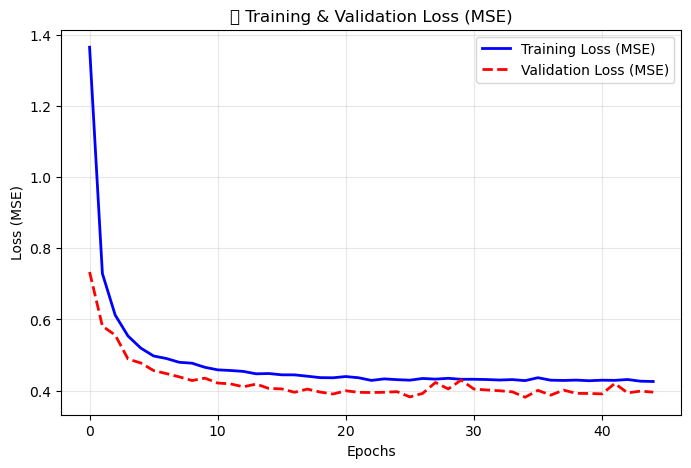

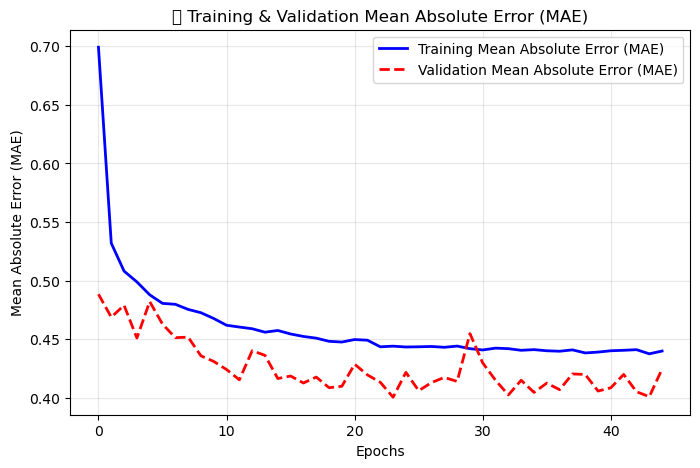

In [19]:
import matplotlib.pyplot as plt

# Define a function to plot training history
def plot_training_history(history, metric, metric_label):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history[metric], label=f'Training {metric_label}', color='blue', linewidth=2)
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric_label}', color='red', linestyle='dashed', linewidth=2)
    plt.xlabel("Epochs")
    plt.ylabel(metric_label)
    plt.legend()
    plt.title(f"📊 Training & Validation {metric_label}")
    plt.grid(alpha=0.3)
    plt.show()

# Plot Training & Validation Loss (MSE)
plot_training_history(history, 'loss', 'Loss (MSE)')

# Plot Training & Validation MAE
plot_training_history(history, 'mae', 'Mean Absolute Error (MAE)')
